In [2]:
import os
import sys
import pandas as pd
import nibabel as nb
import nibabel as nib
import numpy as np
import nilearn
import matplotlib.pyplot as plt
from nilearn.plotting import plot_roi, plot_stat_map
from nilearn import datasets, plotting, regions
import nimare
from nimare import meta
from nimare.dataset import Dataset
from nimare.decode import discrete
from nimare.io import convert_neurosynth_to_dataset
from nimare.utils import get_resource_path
sys.path.append('../modeling')
from modeling_utils import get_feature_regions
from wordcloud import WordCloud

exclude = ["cortex", "gyrus", "gyri", "posterior", "anterior", "parietal", "frontal", "temporal", "dorsal", "functional", "lateral", "medial", "network", "saggital", "prefrontal", "frontal", "task", "abstract", "weight", "pre", "inferior", "superior", "cingulate", "occipital", "ventral", "lobule", "middle", "insula", "amygdala", " s ", "resonance", "magnetic", "level", "magnetic"]

In [2]:
datasets = nimare.extract.fetch_neurosynth()
neurosynth_db = datasets[0]

INFO:nimare.extract.utils:Dataset found in /Users/VictoriaShevchenko/.nimare/neurosynth

INFO:nimare.extract.extract:Searching for any feature files matching the following criteria: [('data-neurosynth', 'version-7')]


File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.


In [3]:
neurosynth_dset = convert_neurosynth_to_dataset(
    coordinates_file=neurosynth_db["coordinates"],
    metadata_file=neurosynth_db["metadata"],
    annotations_files=neurosynth_db["features"],
    
)
neurosynth_dset.save("neurosynth_dataset.pkl")

KeyboardInterrupt: 

In [2]:
neurosynth_dset = Dataset.load("neurosynth_dataset.pkl")

In [3]:
schaefer_map = nilearn.datasets.fetch_atlas_schaefer_2018(1000, yeo_networks = 7)
schaefer_map = nb.load(schaefer_map['maps'])

In [122]:
best_features = pd.read_csv(f"../modeling/best_features/100_best_features.csv")
regions_kept = get_feature_regions(best_features, False)
regions_kept = np.where(regions_kept != 0)[0] + 1
roi = np.zeros_like(schaefer_map.get_fdata())

In [123]:
regions_kept

array([  1,   2,   3,   5,   6,  13, 201, 202, 203, 205, 206, 207, 213,
       401, 402, 403, 405, 406, 407, 412, 413, 601, 602, 603, 605, 606,
       607, 613, 801, 802, 803, 805, 806, 807, 813])

In [124]:
prev_best_features = pd.read_csv("../modeling/best_features/100_best_features.csv")
prev_regions_kept = get_feature_regions(prev_best_features, False)
prev_regions_kept = np.where(prev_regions_kept != 0)[0] + 1
regions_kept = np.setdiff1d(regions_kept, prev_regions_kept)

In [125]:
prev_regions_kept

array([  1,   2,   3,   5,   6, 201, 202, 203, 205, 206, 207, 401, 402,
       403, 405, 406, 407, 413, 601, 602, 603, 605, 606, 801, 802, 803,
       805, 806])

In [9]:
def get_grads_from_features(df):
    grads = []
    #only keep the columns that are gradients
    for column in df.columns:
        if "grad" in column:
            value_index = int(column.split("_")[-1])
            i_grad = int(value_index/1000)
            grads.append(i_grad)
    grads = np.array(grads)
    return grads

In [12]:
best_features = pd.read_csv(f"../modeling/best_features/300_best_features.csv")

get_grads_from_features(best_features)

array([128, 131, 132, 124,  24, 129, 130, 131,  29, 133, 126, 131,  27,
       123,  23, 130,  28, 117, 131,  24, 119, 125, 129,  30,  23, 130,
        23, 128, 121, 136,  33, 112,  22, 133,  17, 135,  26, 121,  23,
        21,  28,  27, 122, 129,  26,  25, 132,  22, 119, 125, 128, 131,
       120, 125, 124,  26,  24,  27, 124,  26,  21,  24, 132, 123, 131,
       113,  32, 131, 131,  33, 106,  34, 125, 114,  25, 124,  29, 136,
        19, 123,  27,  18, 120,  14,  29, 127, 127,  23, 136,   7,  16,
        23,  22,  24,  29, 126, 130, 119, 128,  30,  23, 136,  29,  13,
        28,  26,  23, 129, 127, 133,  32,   3,  30, 130,  23,  11,  23,
       128,  22, 124,  22,  19,  33, 123, 124,  27,  22, 122,  27,  17,
       119, 130, 115,  27,  28,  23,  24, 104,  23,  17, 106,  29, 129,
       123, 131, 123,  16, 131,  24, 121, 134, 132,  19,  23,  14,  30,
        11,   8,  29,  21, 135,  27,  27, 130,  29,  21,  28,  29, 125,
        22, 109,  24,  17, 131, 130,  23, 127,  32, 136, 128, 13

In [6]:
best_features

,grad_comb_200_aligned_128605,grad_comb_200_aligned_131005,grad_comb_200_aligned_132005,grad_comb_200_aligned_124404,grad_comb_200_aligned_24805,grad_comb_200_aligned_129605,grad_comb_200_aligned_130605,grad_comb_200_aligned_131400,grad_comb_200_aligned_29600,grad_comb_200_aligned_133000,...,grad_comb_200_aligned_16804,grad_comb_200_aligned_23206,grad_comb_200_aligned_22604,grad_comb_200_aligned_24002,grad_comb_200_aligned_29400,grad_comb_200_aligned_126804,grad_comb_200_aligned_130604,grad_comb_200_aligned_119804,grad_comb_200_aligned_128601,grad_comb_200_aligned_30400
0,-2.768715,-3.096024,-3.380610,-1.431289,-2.825261,-3.258857,-2.458831,2.017570,1.505993,1.606423,...,-1.306867,2.394234,-1.538419,-0.470684,2.170670,-0.753626,-1.290969,-1.265154,-0.130873,1.974419
1,-0.832507,-1.135766,-1.296309,-0.640440,-0.860667,-2.058176,-1.194355,0.127959,0.484907,0.917430,...,0.460418,1.590106,-0.485246,-2.561978,-0.594985,-0.267794,0.281388,-0.121428,-0.653293,1.267449
2,0.147688,0.398079,0.625033,-0.782244,-0.221069,-0.389401,-0.125324,-1.154353,-0.197347,-0.279828,...,-1.394089,0.735345,-0.980640,-0.226496,0.528213,-0.046859,1.030017,-0.475050,-0.430501,3.000586
3,-0.476388,-2.680647,-0.865039,0.092534,-0.330576,-1.520343,-0.664644,0.275999,-0.416703,-0.025917,...,-1.143805,-0.032409,-0.271467,-1.749816,0.078009,-0.282944,0.004138,-0.088341,-0.263062,1.182055
4,-0.172106,-0.349850,-1.368169,-0.035707,-0.825605,-0.501627,-1.714934,3.267170,0.863092,0.010226,...,-1.321110,0.100310,-1.272396,-1.708726,0.711220,-0.489326,-0.285386,0.306671,0.105832,1.839397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,-2.378255,-2.079853,-2.081619,-0.820978,-1.624182,-1.360303,-1.995529,-0.195522,0.631629,1.114911,...,-0.862065,1.109212,-0.690831,-1.883784,1.228038,-0.154581,-1.000635,-0.256381,-0.696402,1.075027
932,-0.949883,-1.267505,-1.365880,-0.880091,-1.512009,-0.147602,-1.097333,0.895759,0.679560,0.220626,...,-1.913830,1.778974,-1.076758,-1.471275,-0.161525,-0.088979,-0.719613,-0.936417,0.216796,1.306290
933,-2.010004,-1.839208,-2.429364,-1.073770,-1.147355,-1.831856,-1.684385,4.106589,3.812485,1.364592,...,-2.663536,0.882938,-1.568943,-2.423225,1.950330,-1.008308,-0.547565,-1.590409,0.355579,4.283908
934,-0.958569,-0.652621,-1.537809,-0.485844,-1.683109,-1.474386,-1.231426,0.762093,1.476763,0.951324,...,-1.078882,0.497183,0.072051,-0.430874,0.035382,-0.348684,-0.333731,-0.261534,-0.295473,1.038183


In [101]:
best_features = pd.read_csv(f"../modeling/best_features/200_best_features.csv")
regions_kept1 = get_feature_regions(best_features, False)
regions_kept1 = np.where(regions_kept1 != 0)[0] + 1
regions_kept = np.setdiff1d(regions_kept1, regions_kept)
roi = np.zeros_like(schaefer_map.get_fdata())

In [147]:
regions_kept

array([ 13, 213, 412, 607, 613, 807, 813])

In [127]:
for region in regions_kept:
    indices = np.where(schaefer_map.get_fdata() == region)
    roi[indices] = 1

In [128]:
roi.shape

(182, 218, 182)

In [129]:
roi_img = nib.Nifti1Image(roi, schaefer_map.affine)

In [130]:
ns_roi = nilearn.image.resample_to_img(roi_img, neurosynth_dset.masker.mask_img, interpolation='nearest')


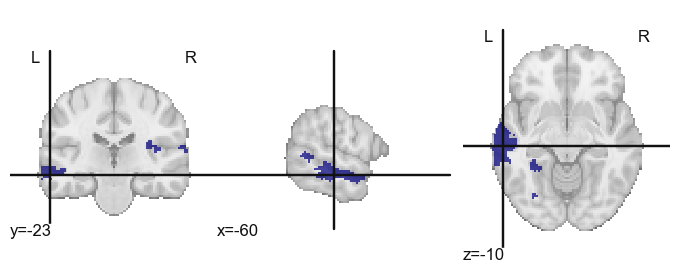

In [106]:
plot_roi(ns_roi)

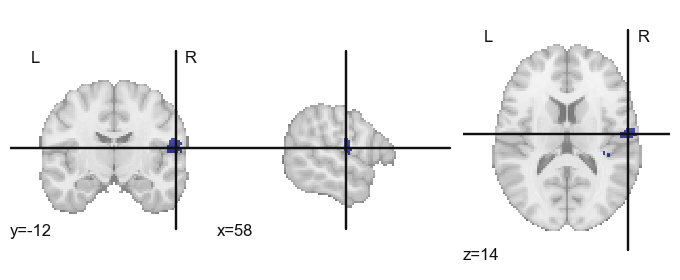

In [131]:
plot_roi(ns_roi)

In [21]:
decoder = discrete.NeurosynthDecoder()
decoder.fit(neurosynth_dset)

In [22]:
ids_use = neurosynth_dset.get_studies_by_mask(ns_roi)

In [23]:
decode_df = decoder.transform(ids=ids_use)

In [24]:
decode_df = decode_df.sort_values(by="probReverse", ascending=False)

In [25]:
sorted_terms = decode_df.index

In [26]:
sorted_terms = np.array([term.replace('terms_abstract_tfidf__','') for term in sorted_terms])

In [27]:
decode_df.index = sorted_terms

In [56]:
import re
text =  " ".join(sorted_terms)
text = text.replace(" cortex", "")
text = text.replace(" gyrus", "")
text = text.replace(" posterior", "")
text = text.replace(" anterior", "")
text = text.replace(" parietal", "")
text = text.replace(" frontal", "")
text = text.replace(" temporal", "")
text = text.replace(" dorsal", "")
text = text.replace(" functional", "")

text = re.sub(r"LDA\d+_abstract_weight__\d+_", "", text) LDA100_abstract_weight__47_
text = re.sub(r"terms_abstract_tfidf__", "", text)
text = text.replace("__", "")
text = text.replace("_", " ")
text = text.replace("  ", " ")




In [15]:
def term_cloud(text, colormap, single_color_func, max_font_size, background_color = None, save_to = None, exclude = None):
    if single_color_func is not None:
        from wordcloud import get_single_color_func
        color_func = get_single_color_func(single_color_func)
    if exclude is not None:
        for word in exclude:
            text = text.replace(word, "")
    wordcloud = WordCloud(max_font_size=max_font_size, background_color = background_color, colormap = colormap, relative_scaling = 1, color_func = color_func).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    if save_to is not None:
        wordcloud.to_file(save_to)

In [7]:
cog_terms = open(f"cog_terms/100_best_features_cog_terms.txt", "r")
cog_terms = cog_terms.read()
exclude = ["cortex", "gyrus", "gyri", "posterior", "anterior", "parietal", "frontal", "temporal", "dorsal", "functional", "lateral", "medial", "network", "saggital", "prefrontal", "frontal", "task", "abstract", "weight", "pre", "inferior", "superior", "cingulate", "occipital", "ventral", "lobule", "middle", "insula", "amygdala", " s ", "resonance", "magnetic", "level", "magnetic"]

In [5]:
def exclude_terms(text, exclude):
    for word in exclude:
        text = text.replace(word, "")
    return text

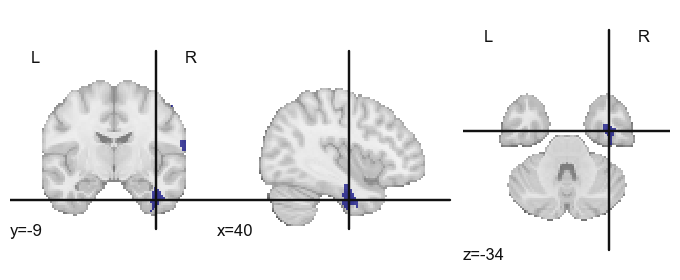

In [31]:
plot_roi(ns_roi)

# Frequency Analysis

In [29]:
from collections import Counter

n_features = np.loadtxt("n_features.txt", dtype=str).tolist()
term_freq_df = []

for n in n_features:
    cog_terms = open(f"cog_terms/{n}_best_features_cog_terms.txt", "r")
    cog_terms = cog_terms.read()
    for word in exclude:
        cog_terms = cog_terms.replace(word, "")
    words = cog_terms.split()
    word_freq = Counter(words)
    print(word_freq)
    df = pd.DataFrame(word_freq.items(), columns=['term', 'frequency'])
    df = df.sort_values(by='frequency', ascending=False)
    df = df.reset_index(drop=True)
    df["N Features"] = int(n)
    df = df[:20]
    df["Rank"] = np.arange(1, len(df) + 1)
    df["label"] = df.apply(lambda row: f"{row['term']}, f = {row['frequency']}", axis=1)
    term_freq_df.append(df)
term_freq_df = pd.concat(term_freq_df)


Counter({'visual': 34, 'memory': 33, 'motor': 30, 'control': 29, 'response': 24, 'cognitive': 24, 'disorder': 21, 'age': 20, 'healthy': 20, 'time': 19, 'performance': 18, 'matter': 18, 'auditory': 17, 'group': 17, 'negative': 17, 'attention': 16, 'stimulation': 16, 'emotional': 15, 'state': 15, 'social': 14, 'high': 13, 'connectivity': 13, 'faces': 13, 'risk': 13, 'mechanisms': 12, 'word': 12, 'mental': 12, 'language': 12, 'spatial': 12, 'recognition': 12, 'fronto': 12, 'somatosensory': 12, 'adults': 12, 'eye': 11, 'using': 11, 'human': 11, 'disease': 11, 'resting': 11, 'stimulus': 10, 'lobe': 10, 'involved': 10, 'volume': 10, 'face': 9, 'vious': 9, 'role': 9, 'model': 9, 'interaction': 9, 'frequency': 9, 'positive': 9, 'striatum': 9, 'fusiform': 8, 'decision': 8, 'sulcus': 8, 'cortices': 8, 'early': 8, 'speech': 8, 'perception': 8, 'patterns': 8, 'attentional': 8, 'pfc': 8, 'dorso': 8, 'cerebral': 8, 'primary': 8, 'trial': 8, 'ms': 8, 'working': 8, 'learning': 8, 'suggest': 8, 'underl

In [85]:
n_features

['100',
 '200',
 '300',
 '400',
 '500',
 '600',
 '700',
 '800',
 '900',
 '1000',
 '1200',
 '1400',
 '1600',
 '1800',
 '2000',
 '3000',
 '4000',
 '5000',
 '7000',
 '8000',
 '9000',
 '10000']

In [40]:
from collections import Counter

n_features = np.loadtxt("n_features.txt", dtype=str).tolist()[:17]
term_freq_df = []

cog_terms_list= []
for n in n_features:
    ind = n_features.index(n)
    cog_terms = open(f"cog_terms/{n}_best_features_cog_terms.txt", "r")
    cog_terms = cog_terms.read()
    cog_terms = exclude_terms(cog_terms, exclude)
    cog_terms = cog_terms.split()
    if ind == 0:
        cog_terms_list.append(cog_terms)
    else:
        for sum_n in n_features[:ind]:
            cumulative_cog_terms = []
            prev_cog_terms = open(f"cog_terms/{sum_n}_best_features_cog_terms.txt", "r")
            prev_cog_terms = prev_cog_terms.read()
            prev_cog_terms = exclude_terms(prev_cog_terms, exclude)
            prev_cog_terms = prev_cog_terms.split()
            cog_terms.extend(prev_cog_terms)
        cog_terms_list.append(cog_terms)


for ind, n in enumerate(n_features):
    word_freq = Counter(cog_terms_list[ind])
    df = pd.DataFrame(word_freq.items(), columns=['term', 'frequency'])
    df = df.sort_values(by='frequency', ascending=False)
    df = df.reset_index(drop=True)
    df["N Features"] = int(n)
    df = df[:20]
    df["Rank"] = np.arange(1, len(df) + 1)
    df["label"] = df.apply(lambda row: f"{row['term']}, f = {row['frequency']}", axis=1)
    term_freq_df.append(df)
term_freq_df = pd.concat(term_freq_df)


In [41]:
import plotly.express as px
from plotly_gif import GIF, two_d_time_series

unique_ranks = df['Rank'].unique()
fig = px.bar(term_freq_df, x='frequency', y='Rank',
                 color='frequency', text='label',
                 animation_frame='N Features',
                 animation_group='term',
                 range_x=[0,term_freq_df["frequency"].max()],
                 range_y=[0.5, 30.5],
                orientation='h', width=800, height=1000,
                color_continuous_scale='Bluered')
fig.update_xaxes(title='Frequency', visible=True)
fig.update_yaxes(autorange='reversed', title='Rank',
                 visible=True, showticklabels=True, tickmode='array', tickvals=unique_ranks)
fig.update_layout(xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=True),
                  title='Term Freq in Neurosynth', showlegend=False)
fig.update_traces(textfont=dict(
        size=15), width = 1)

fig.update_layout(transition = {'duration': 1000})
fig.update_coloraxes(showscale=False)

# remove color legend
#fig.add_vline(x=best_acc)
#fig.update_traces(textposition='middle left')
fig.show()
#fig.write_html("model_rank_1grad_disp.html")




In [10]:
import plotly.express as px
from plotly_gif import GIF, two_d_time_series

for n in n_features:
    df = term_freq_df
    df = df[df["N Features"] == int(n)]
    unique_ranks = df['Rank'].unique()
    fig = px.bar(df, x='frequency', y='Rank',
                    color='frequency', text='label',
                    range_x=[0,term_freq_df["frequency"].max()],
                    orientation='h', width=800, height=1000,
                    color_continuous_scale='Bluered')
    fig.update_xaxes(title='Frequency', visible=True)
    fig.update_yaxes(autorange='reversed', title='Rank',
                    visible=True, showticklabels=True, tickmode='array', tickvals=unique_ranks)
    fig.update_layout(xaxis=dict(showgrid=False),
                    yaxis=dict(showgrid=True),
                    title=f'Term Freq in Neurosynth: N_features = {n}', showlegend=False)
    fig.update_traces(textfont=dict(
            size=15), width = 1)
    fig.update_coloraxes(showscale=False)

    # remove color legend
    #fig.add_vline(x=best_acc)
    #fig.update_traces(textposition='middle left')
    fig.show()
    fig.write_image(f"../../figures/term_analysis/term_freq_{n}_features.png")

#fig.write_html("model_rank_1grad_disp.html")

In [153]:
from collections import Counter

cog_terms = open(f"cog_terms/100_best_features_cog_terms.txt", "r")
cog_terms = cog_terms.read()
for word in exclude:
    cog_terms = cog_terms.replace(word, "")

words = cog_terms.split()
word_freq = Counter(words)
df = pd.DataFrame(word_freq.items(), columns=['term', 'frequency'])
df = df.sort_values(by='frequency', ascending=False)
df = df.reset_index(drop=True)

In [42]:
import re

n_features_list = np.loadtxt("n_features.txt", dtype=str).tolist()[:10]
neurosynth_dset = Dataset.load("neurosynth_dataset.pkl")

schaefer_map = nilearn.datasets.fetch_atlas_schaefer_2018(1000, yeo_networks = 7)
schaefer_map = nb.load(schaefer_map['maps'])

for n_features in n_features_list:
    best_features = pd.read_csv(f"../modeling/best_features/{n_features}_best_features.csv")
    regions_kept = get_feature_regions(best_features, False)
    regions_kept = np.where(regions_kept != 0)[0] + 1
    if n_features != "100":
        prev_best_features = pd.read_csv(f"../modeling/best_features/{n_features_list[n_features_list.index(n_features) - 1]}_best_features.csv")
        prev_regions_kept = get_feature_regions(prev_best_features, False)
        prev_regions_kept = np.where(prev_regions_kept != 0)[0] + 1
        regions_kept = np.setdiff1d(regions_kept, prev_regions_kept)

    roi = np.zeros_like(schaefer_map.get_fdata())
    print("Number of regions kept: ", len(regions_kept))

    for region in regions_kept:
        indices = np.where(schaefer_map.get_fdata() == region)
        roi[indices] = 1

    roi_img = nib.Nifti1Image(roi, schaefer_map.affine)
    ns_roi = nilearn.image.resample_to_img(roi_img, neurosynth_dset.masker.mask_img, interpolation='nearest')

    del roi_img

    decoder = discrete.NeurosynthDecoder()
    decoder.fit(neurosynth_dset)
    ids_use = neurosynth_dset.get_studies_by_mask(ns_roi)
    decode_df = decoder.transform(ids=ids_use) 
    decode_df = decode_df.sort_values(by="probReverse", ascending=False)
    decode_df.to_csv(f"cog_terms/{n_features}_best_features_decode.csv")
    sorted_terms = decode_df.index
    sorted_terms = np.array([term.replace('terms_abstract_tfidf__','') for term in sorted_terms])

    del decode_df
    text =  " ".join(sorted_terms)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"LDA_", "", text)
    text = text.replace("__", "")
    text = text.replace("_", " ")
    text = text.replace("  ", " ")

    text_file = open(f"cog_terms/{n_features}_best_features_cog_terms.txt", "w")
    writer = text_file.write(text)
    text_file.close()

    print("Cog terms saved.")

Number of regions kept:  28
Cog terms saved.
Number of regions kept:  7
Cog terms saved.
Number of regions kept:  7
Cog terms saved.
Number of regions kept:  9
Cog terms saved.
Number of regions kept:  4
Cog terms saved.
Number of regions kept:  12
Cog terms saved.
Number of regions kept:  4
Cog terms saved.
Number of regions kept:  6
Cog terms saved.
Number of regions kept:  3
Cog terms saved.
Number of regions kept:  4
Cog terms saved.


In [107]:
n_features_list = np.loadtxt("n_features.txt", dtype=str).tolist()
features_decoded = []
for n in n_features_list:
    decode_df = pd.read_csv(f"cog_terms/{n}_best_features_decode.csv")
    decode_df["Term"] = [re.sub(r"LDA\d+_abstract_weight__\d+_", "", term) for term in decode_df["Term"]]
    decode_df["Term"] = decode_df.apply(lambda row: row["Term"].replace(r'terms_abstract_tfidf__',''), axis=1)
    decode_df["Term"] = decode_df.apply(lambda row: row["Term"].replace(r'_',' '), axis=1)
    mask = decode_df['Term'].str.contains('|'.join(exclude))
    decode_df = decode_df[~mask]
    print(decode_df[mask])
    decode_df["N Features"] = int(n)
    decode_df = decode_df[:20]
    decode_df["Rank"] = np.arange(1, len(decode_df) + 1)
    decode_df["label"] = decode_df.apply(lambda row: f"{row['Term']}, P = {np.round(row['probReverse'], 2)}", axis=1)
    features_decoded.append(decode_df)
features_decoded = pd.concat(features_decoded)
    


    

Empty DataFrame
Columns: [Term, pForward, zForward, probForward, pReverse, zReverse, probReverse]
Index: []
Empty DataFrame
Columns: [Term, pForward, zForward, probForward, pReverse, zReverse, probReverse]
Index: []
Empty DataFrame
Columns: [Term, pForward, zForward, probForward, pReverse, zReverse, probReverse]
Index: []
Empty DataFrame
Columns: [Term, pForward, zForward, probForward, pReverse, zReverse, probReverse]
Index: []
Empty DataFrame
Columns: [Term, pForward, zForward, probForward, pReverse, zReverse, probReverse]
Index: []
Empty DataFrame
Columns: [Term, pForward, zForward, probForward, pReverse, zReverse, probReverse]
Index: []
Empty DataFrame
Columns: [Term, pForward, zForward, probForward, pReverse, zReverse, probReverse]
Index: []
Empty DataFrame
Columns: [Term, pForward, zForward, probForward, pReverse, zReverse, probReverse]
Index: []
Empty DataFrame
Columns: [Term, pForward, zForward, probForward, pReverse, zReverse, probReverse]
Index: []
Empty DataFrame
Columns: [Te

In [109]:
features_decoded

,Term,pForward,zForward,probForward,pReverse,zReverse,probReverse,N Features,Rank,label
2,word form,1.0,-0.0,0.488585,6.982913e-07,4.961838,0.627223,100,1,"word form, P = 0.63"
4,visual word,1.0,-0.0,0.476891,4.468265e-07,5.047843,0.618321,100,2,"visual word, P = 0.62"
6,speaker,1.0,-0.0,0.470824,1.043671e-04,3.880208,0.612674,100,3,"speaker, P = 0.61"
9,mental imagery,1.0,-0.0,0.462130,2.194645e-04,3.695488,0.605374,100,4,"mental imagery, P = 0.61"
10,characters,1.0,-0.0,0.461246,9.680927e-05,3.898453,0.604769,100,5,"characters, P = 0.6"
...,...,...,...,...,...,...,...,...,...,...
21,names,1.0,-0.0,0.765783,7.212654e-03,2.686863,0.545483,10000,16,"names, P = 0.55"
22,dominance,1.0,-0.0,0.765039,3.881031e-04,3.548044,0.545418,10000,17,"dominance, P = 0.55"
24,orthographic,1.0,-0.0,0.764479,6.112140e-04,3.426589,0.545033,10000,18,"orthographic, P = 0.55"
25,experimental conditions,1.0,-0.0,0.764768,1.155705e-02,2.525388,0.544828,10000,19,"experimental conditions, P = 0.54"


In [108]:
exclude = ["cortex", "gyrus", "gyri", "posterior", "anterior", "functional", "lateral", "medial", "network", "saggital", "prefrontal", "frontal", "task", "abstract", "weight", "pre", "inferior", "superior", "ventral", "lobule", "middle", " s ", "resonance", "magnetic", "level", "magnetic", "impacts", "sii", "grasping", "correlating", "whilst", "correspond", "sparse"]

In [110]:
import plotly.express as px

unique_ranks = features_decoded['Rank'].unique()
fig = px.bar(features_decoded, x='probReverse', y='Rank',
                 color='probReverse', text='label',
                 animation_frame='N Features',
                 animation_group='Term',
                 range_x=[0,features_decoded["probReverse"].max()],
                 range_y=[0.5, 30.5],
                orientation='h', width=800, height=1000,
                color_continuous_scale='Bluered')
fig.update_xaxes(title='probReverse', visible=True)
fig.update_yaxes(autorange='reversed', title='Rank',
                 visible=True, showticklabels=True, tickmode='array', tickvals=unique_ranks)
fig.update_layout(xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=True),
                  title='Term Prob in Neurosynth', showlegend=False)
fig.update_traces(textfont=dict(
        size=15), width = 1)

fig.update_layout(transition = {'duration': 1000})
fig.update_coloraxes(showscale=False)

# remove color legend
#fig.add_vline(x=best_acc)
#fig.update_traces(textposition='middle left')
fig.show()
#fig.write_html("model_rank_1grad_disp.html")




In [114]:
features_decoded["N Features"]

2       100
4       100
6       100
9       100
10      100
      ...  
21    10000
22    10000
24    10000
25    10000
26    10000
Name: N Features, Length: 440, dtype: int64

In [123]:
for n in n_features_list:
    df = features_decoded[features_decoded["N Features"] == int(n)]
    unique_ranks = df['Rank'].unique()
    fig = px.bar(df, x='probReverse', y='Rank',
                    color='probReverse', text='label',
                    animation_frame='N Features',
                    animation_group='Term',
                    range_x=[0,features_decoded["probReverse"].max()],
                    range_y=[0.5, 30.5],
                    orientation='h', width=800, height=1000,
                    color_continuous_scale='Bluered')
    fig.update_xaxes(title='probReverse', visible=True)
    fig.update_yaxes(autorange='reversed', title='Rank',
                    visible=True, showticklabels=True, tickmode='array', tickvals=unique_ranks)
    fig.update_layout(xaxis=dict(showgrid=False),
                    yaxis=dict(showgrid=True),
                    title=f'Term Prob in Neurosynth: N Features = {n}', showlegend=False, font=dict(size=22))
    fig.update_traces(textfont=dict(
            size=23), width = 1)
    fig.update_coloraxes(showscale=False)

    # remove color legend
    #fig.add_vline(x=best_acc)
    #fig.update_traces(textposition='middle left')
    fig.show()
    fig.write_image(f"../../figures/term_analysis/term_prob_{n}_features.svg")

#fig.write_html("model_rank_1grad_disp.html")